In [1]:
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt 

In [4]:
path = 'Advertising.csv'
ad = pd.read_csv(path)
df = ad.copy()
df.head()

df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
X = df[['TV']]
y = df['sales']

In [6]:
lm = smf.ols('sales ~ TV', df)
ols = lm.fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 29 Nov 2021   Prob (F-statistic):           1.47e-42
Time:                        15:04:55   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
mse = mean_squared_error(y, ols.fittedvalues)
print('MSE :', mse)

rmse = np.sqrt(mse)
print('RMSE :', rmse)

ols.resid[:10]

MSE : 10.512652915656757
RMSE : 3.2423221486546887


0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

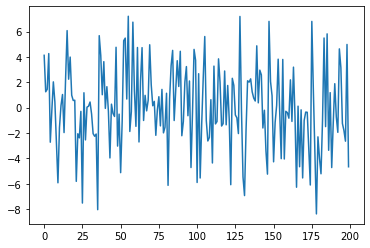

In [11]:
plt.plot(ols.resid)

In [13]:
reg = LinearRegression()
reg.fit(X, y)

regmodel = reg.fit(X, y)

In [15]:
regmodel.score(X, y)

0.611875050850071

## Maaslar Veri Setinin Incelenmesi

In [88]:
maas = pd.read_csv('maaslar.csv')
df = maas.copy()
df.head()

,Calisan ID,unvan,UnvanSeviyesi,Kidem,Puan,maas
0,1,Cayci,1,5,70,2250
1,2,Sekreter,2,5,70,2500
2,3,Uzman Yardimcisi,3,5,70,3000
3,4,Uzman,4,5,70,4000
4,5,Proje Yoneticisi,5,5,70,5500


In [26]:
df.drop(['Calisan ID', 'unvan'], axis=1 , inplace=True)
df.head()

,UnvanSeviyesi,Kidem,Puan,maas
0,1,5,70,2250
1,2,5,70,2500
2,3,5,70,3000
3,4,5,70,4000
4,5,5,70,5500


In [70]:
X = df.iloc[:,0:3]
y = df['maas']

In [71]:
lm = sm.OLS(y, X)
ols_maas = lm.fit()
ols_maas.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   maas   R-squared (uncentered):                   0.679
Model:                            OLS   Adj. R-squared (uncentered):              0.644
Method:                 Least Squares   F-statistic:                              19.08
Date:                Mon, 29 Nov 2021   Prob (F-statistic):                    7.62e-07
Time:                        19:29:23   Log-Likelihood:                         -317.95
No. Observations:                  30   AIC:                                      641.9
Df Residuals:                      27   BIC:                                      646.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
UnvanSeviyesi  2494.8107    537.146      4.645      0.000    1392.677    3596.944
Kidem             1.3531    668.935      0.002      0.998   -1371.187    1373.894
Puan            -26.5687     70.579     -0.376      0.710    -171.385     118.248
==============================================================================
Omnibus:                       40.370   Durbin-Watson:                   1.194
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.722
Skew:                           2.897   Prob(JB):                     5.01e-28
Kurtosis:                      11.186   Cond. No.                         23.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
ols_maas.rsquared

0.6794527594566757

In [73]:
mse = mean_squared_error(y, ols_maas.fittedvalues)
mse

94024439.19556044

In [95]:
hata = pd.DataFrame({'tahmin_deger': ols_maas.fittedvalues[:],
              'gercek_deger': y[:]
             })
hata['Hata_Fark'] = hata['tahmin_deger'] - hata['gercek_deger']
hata.head()

,tahmin_deger,gercek_deger,Hata_Fark
0,641.769766,2250,-1608.230234
1,3136.580459,2500,636.580459
2,5631.391151,3000,2631.391151
3,8126.201843,4000,4126.201843
4,10621.012535,5500,5121.012535


In [96]:
hata['Fark_Kare'] = hata['Hata_Fark']**2
hata.head()

,tahmin_deger,gercek_deger,Hata_Fark,Fark_Kare
0,641.769766,2250,-1608.230234,2.586404e+06
1,3136.580459,2500,636.580459,4.052347e+05
2,5631.391151,3000,2631.391151,6.924219e+06
3,8126.201843,4000,4126.201843,1.702554e+07
4,10621.012535,5500,5121.012535,2.622477e+07


In [97]:
ols_maas.resid
absresid = abs(ols_maas.resid)

absresid.sort_values(ascending=False).head()

29    37244.914203
9     26904.934004
25    10917.079933
15     9041.667137
27     8962.407389
dtype: float64

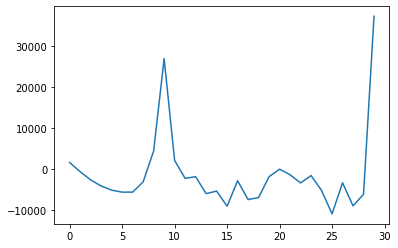

In [83]:
plt.plot(ols_maas.resid)

In [128]:
reg2 =LinearRegression()

reg2.fit(X, y)

modelL2 = reg.fit(X, y)

modelL2.score(X, y)

0.5857207050854022

In [125]:
ols_maas.rsquared

0.6794527594566757

In [104]:
X1 = df['UnvanSeviyesi']
y1 = df['maas']

lm3 = sm.OLS(y1, X1)
ols_unvan = lm3.fit()
ols_unvan.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   maas   R-squared (uncentered):                   0.676
Model:                            OLS   Adj. R-squared (uncentered):              0.665
Method:                 Least Squares   F-statistic:                              60.59
Date:                Mon, 29 Nov 2021   Prob (F-statistic):                    1.39e-08
Time:                        19:50:08   Log-Likelihood:                         -318.10
No. Observations:                  30   AIC:                                      638.2
Df Residuals:                      29   BIC:                                      639.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
UnvanSeviyesi  2269.9134    291.626      7.784      0.000    1673.472    2866.355
==============================================================================
Omnibus:                       42.594   Durbin-Watson:                   1.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.872
Skew:                           3.058   Prob(JB):                     9.46e-32
Kurtosis:                      11.768   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
print(ols_unvan.rsquared)

0.6762863241348265


In [133]:
x1 = df.iloc[:,2:3]
y1 = df.iloc[:,-1:]

X1= x1.values
Y1 = y1.values

reg3 = LinearRegression()
reg3.fit(X1, Y1)

reg_unvan = reg3.fit(X1, y1)
reg_unvan.score(X1, y1)

0.5285811733746242

In [149]:
print(type(x1),'\n', type(y),'\n' ,type(X1),'\n' )

<class 'pandas.core.frame.DataFrame'> 
 <class 'pandas.core.series.Series'> 
 <class 'numpy.ndarray'> 

